# Netflix Movie Data Analysis Project

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the data

In [6]:
df = pd.read_csv(r"C:\work_space\mymoviedb.csv")
df.head()

,Release_Date,Release_YEARS,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## data understanding

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Release_YEARS      9827 non-null   int64  
 2   Title              9827 non-null   object 
 3   Overview           9827 non-null   object 
 4   Popularity         9826 non-null   float64
 5   Vote_Count         9826 non-null   float64
 6   Vote_Average       9826 non-null   float64
 7   Original_Language  9826 non-null   object 
 8   Genre              9826 non-null   object 
 9   Poster_Url         9826 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 767.9+ KB


In [8]:
df.dtypes

Release_Date          object
Release_YEARS          int64
Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

In [9]:
df.isnull().sum()

Release_Date         0
Release_YEARS        0
Title                0
Overview             0
Popularity           1
Vote_Count           1
Vote_Average         1
Original_Language    1
Genre                1
Poster_Url           1
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

## data cleaning

### 1.changing the data type

In [11]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"] ,errors="coerce")
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"],errors="coerce")


In [12]:
df["Vote_Count"] = df["Vote_Count"].astype("Int64")
df["Vote_Average"] = df["Vote_Average"].astype("float")
df.dtypes

Release_Date          object
Release_YEARS          int64
Title                 object
Overview              object
Popularity           float64
Vote_Count             Int64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

In [13]:
df["Release_YEARS"] = pd.to_numeric(df["Release_YEARS"], errors="coerce")
print(df["Release_YEARS"].dtype)



int64


In [14]:
df.head()

,Release_Date,Release_YEARS,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### 2.Check if there are ANY null values

In [15]:
df.isnull().sum()
df.dropna(inplace=True)

### 3.checking the duplicated values

In [16]:
df.duplicated().sum()

np.int64(0)

### 4.droping the unwanted values which are irrelevant for the analysis

In [18]:
df.drop(columns=["Overview","Original_Language","Poster_Url","Release_Date"],inplace=True)

In [20]:
df.tail()

,Release_YEARS,Title,Popularity,Vote_Count,Vote_Average,Genre
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,3.5,Horror
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"
9826,1984,Threads,13.354,186,7.8,"War, Drama, Science Fiction"


### 5.Making each Genre for row for proper analysis

In [21]:
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre").reset_index(drop=True)

In [22]:
df.tail()

,Release_YEARS,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25789,1984,Threads,13.354,186,7.8,War
25790,1984,Threads,13.354,186,7.8,Drama
25791,1984,Threads,13.354,186,7.8,Science Fiction


In [23]:
df["Genre"].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

### 6.How can numerical features be categorized into meaningful groups using quartiles for Vote_Average?

In [24]:
def categorized_col(df,col,lables):
    df[col] = pd.to_numeric(df[col],errors="coerce")
    df=df.dropna(subset=[col])

    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]
            ]
    df[col] = pd.cut(df[col],edges,labels = labels,
                     duplicates="drop")

    return df

In [25]:
labels=["not_popular","below_average","average","popular"]
df=categorized_col(df,"Vote_Average",labels)

In [26]:
df.head()

,Release_YEARS,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [27]:
df["Vote_Average"].value_counts()

Vote_Average
not_popular      6999
below_average    6581
average          6431
popular          5540
Name: count, dtype: int64

## Data Visualization

In [28]:
df["Genre"].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

### 1.What is the most frequent genre of movies released on Netflix?

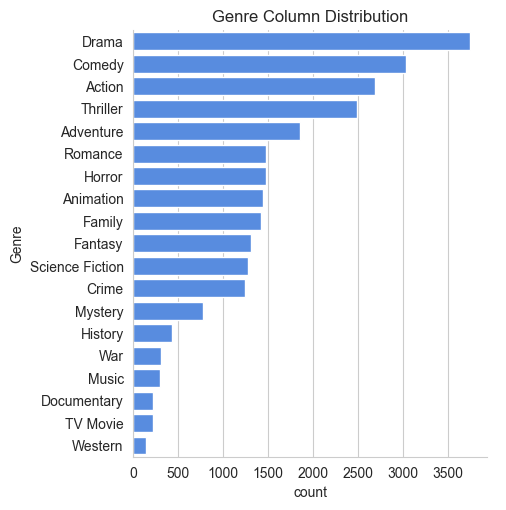

In [29]:
sns.set_style("whitegrid")
sns.catplot(y="Genre",data=df,kind="count",
            order=df["Genre"].value_counts().index,
            color="#4287f5")
plt.title("Genre Column Distribution")
plt.show()


### 2.Which has highest votes in vote avg column?

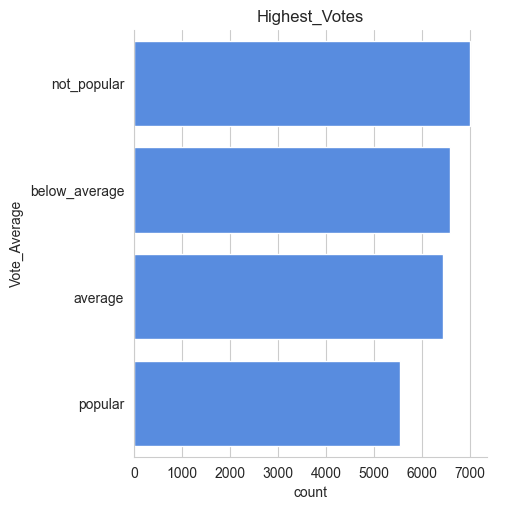

In [30]:
sns.catplot(y="Vote_Average",data=df,kind="count",
            order=df["Vote_Average"].value_counts().index,
            color="#4287f5")
plt.title("Highest_Votes")
plt.show()

### 3.What movie got the highest popularity? what's its genre?

In [31]:
df[df["Popularity"] == df["Popularity"].max()]

,Release_YEARS,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### 4.What movie got the lowest popularity? what's its genre?

In [32]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_YEARS,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,popular,War
25790,1984,Threads,13.354,186,popular,Drama
25791,1984,Threads,13.354,186,popular,Science Fiction


### 5.Which year has the most filmmed movies?


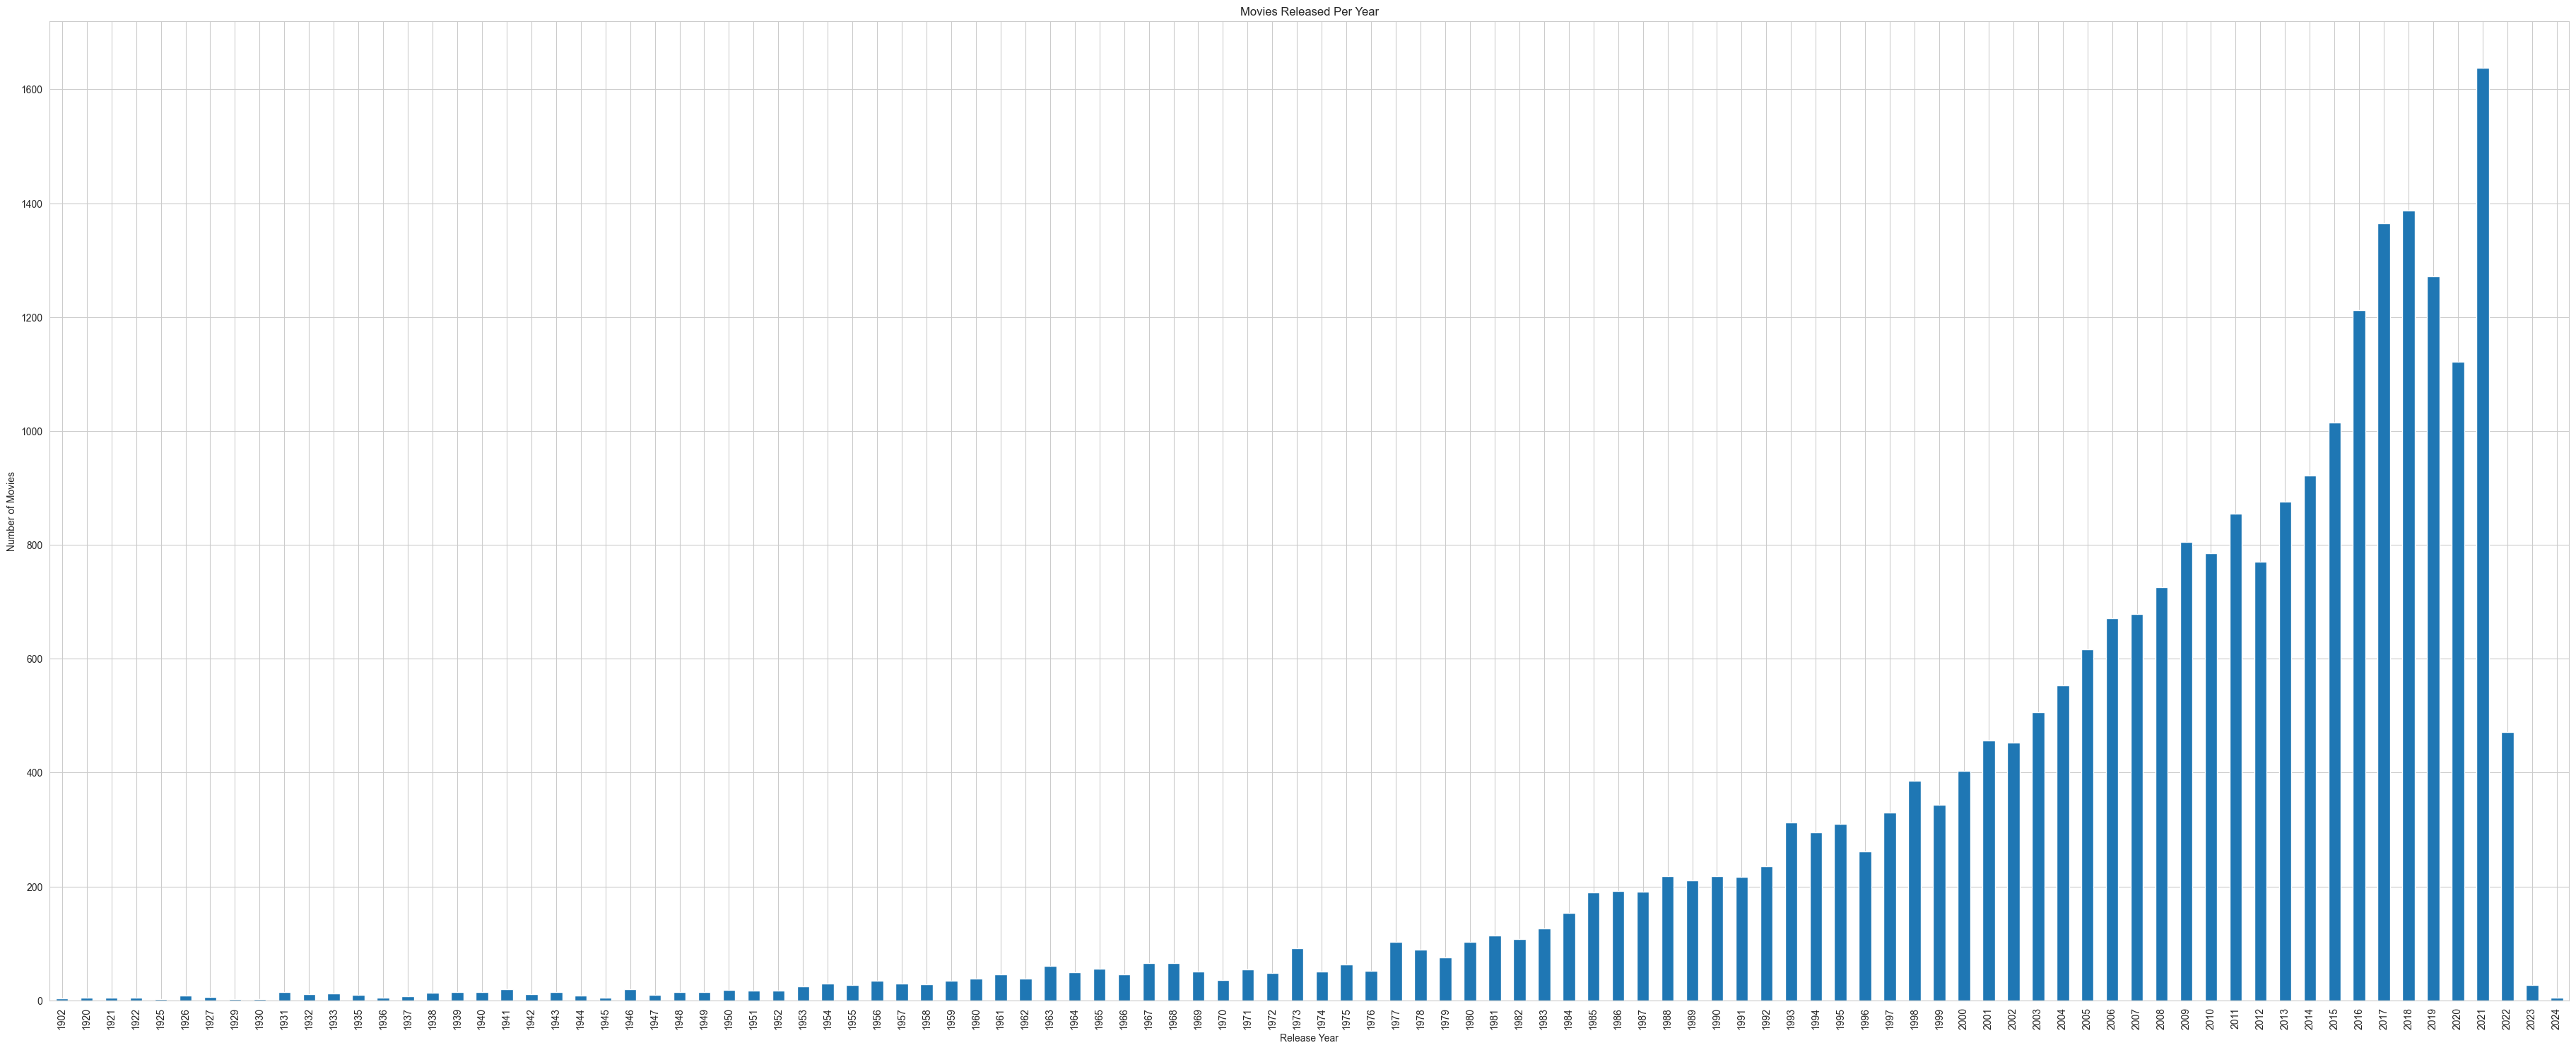

In [44]:
df["Release_YEARS"].value_counts().sort_index().plot(kind="bar", figsize=(46,18))

plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Movies Released Per Year")
plt.show()
